In [84]:
import torch
torch.cuda.empty_cache() 

In [85]:
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())

PyTorch version: 2.0.1+cu117
Torchvision version: 0.15.2+cu117
CUDA is available: True


In [86]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:100000"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2
os.getcwd()

'/home/yelhe/script/mt'

In [88]:
import glob
import shapely
from shapely.geometry import Polygon
import shapely.plotting

In [89]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

In [117]:
# Model type: default/vit_h, vit_l, vit_b


from segment_anything import SamPredictor, sam_model_registry
# sam = sam_model_registry["<model_type>"](checkpoint="<path/to/checkpoint>")
sam = sam_model_registry["vit_h"](checkpoint="/home/yelhe/data/sam/sam_vit_h_4b8939.pth")
# predictor = SamPredictor(sam)
# predictor.set_image(<your_image>)
# masks, _, _ = predictor.predict(<input_prompts>)

In [91]:
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
mask_generator = SamAutomaticMaskGenerator(sam)

In [106]:
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
imageo = cv2.imread("/home/yelhe/data/fig/06.jpg")
imageo = cv2.cvtColor(imageo, cv2.COLOR_BGR2RGB)
maskso = mask_generator.generate(imageo)

In [107]:
print("o",len(maskso))

o 48


In [108]:
maskso

[{'segmentation': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  'area': 1001378,
  'bbox': [0, 0, 1919, 684],
  'predicted_iou': 1.0362443923950195,
  'point_coords': [[1650.0, 556.875]],
  'stability_score': 0.9671528339385986,
  'crop_box': [0, 0, 1920, 1080]},
 {'segmentation': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  'area': 125136,
  'bbox': [725, 841,

<function matplotlib.pyplot.show(close=None, block=None)>

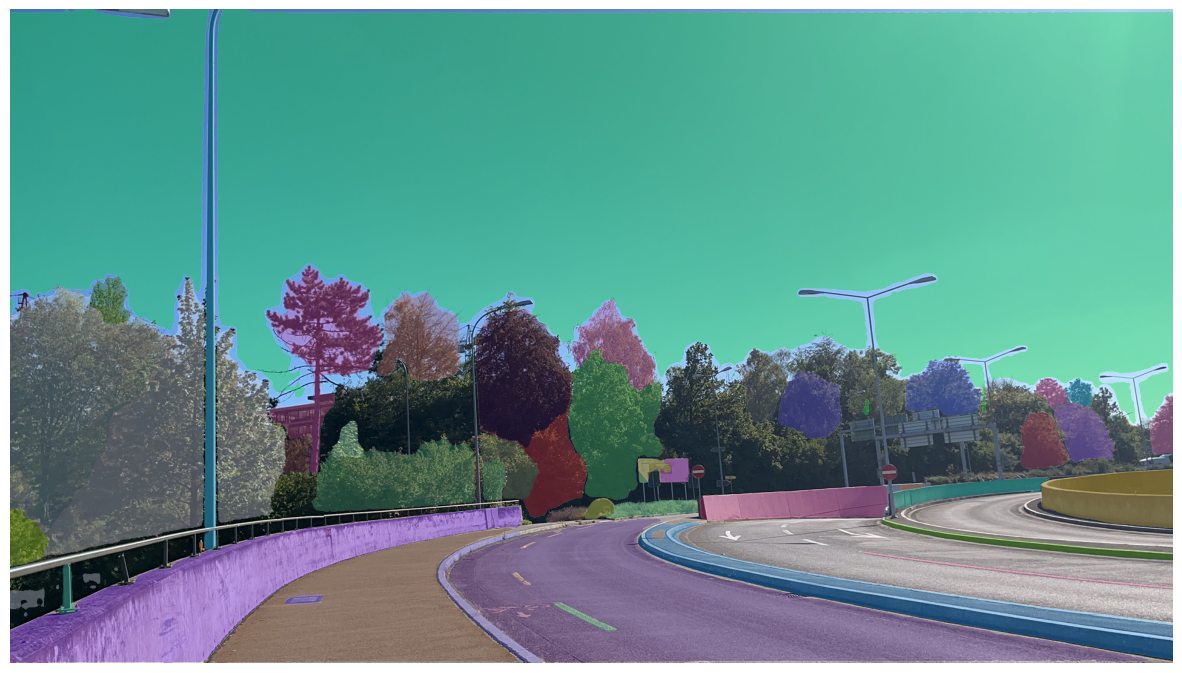

In [109]:
plt.figure(figsize = (15,15))
plt.imshow(imageo)
show_anns(maskso)
plt.axis('off')
plt.show

In [110]:
# np.save(maskso[0]['segmentation'] # -> export as numpy file npy

In [113]:
# Binary Boolean
masksob = []
for i in range(0, len(maskso)):
    masksob.append(maskso[i]['segmentation'])
#masksob = masksob.astype(int)

In [115]:
# Binary integer 
masksob2 = []
for i in range(0, len(masksob)):
    masksob2.append(masksob[i]*1)

In [130]:
print(masksob2[0].dtype)
m0 = masksob2[0].astype('uint8')
print(m0.dtype)

int64
uint8


In [87]:
# pip install shapely

In [12]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "/home/yelhe/data/sam/sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

# sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

In [13]:
torch.cuda.memory_allocated(device="cuda")
# The reture value is in unit bytes

2631485952

In [14]:
from segment_anything.utils.transforms import ResizeLongestSide
resize_transform = ResizeLongestSide(sam.image_encoder.img_size)

def prepare_image(image, transform, device):
    image = transform.apply_image(image)
    image = torch.as_tensor(image, device=device.device) 
    return image.permute(2, 0, 1).contiguous()

#### Export each masks

In [15]:
from amg_0 import *

In [16]:
# Add function def show_anns (borrowed from one of the Jupyter notebooks).


def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    # polygons = []
    # color = []
    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)
    # for ann in sorted_anns:
    #     m = ann['segmentation']
    #     img = np.ones((m.shape[0], m.shape[1], 3))
    #     color_mask = np.random.random((1, 3)).tolist()[0]
    #     for i in range(3):
    #         img[:,:,i] = color_mask[i]
    #     ax.imshow(np.dstack((img, m*0.35)))

# Add new function def write_masks_to_png (again some borrowed code from the readme).

def write_masks_to_png(masks: List[Dict[str, Any]], image, path: str) -> None:
    plt.figure(figsize=(20,20))
    plt.imshow(image)
    show_anns(masks)
    plt.axis('off')
    #plt.show()
    filename = f"masks.png"
    plt.savefig(os.path.join(path, filename))
    return



In [37]:
# plt.figure(figsize = (15,15))
# plt.imshow(imageo)
# show_anns(maskso)
# plt.axis('off')
# plt.show

In [38]:
# write_masks_to_png(maskso, imageo, "/home/yelhe/script/mt/output/")

In [39]:
# write_masks_to_folder(maskso, "/home/yelhe/script/mt/output/mask1/")

<function matplotlib.pyplot.show(close=None, block=None)>

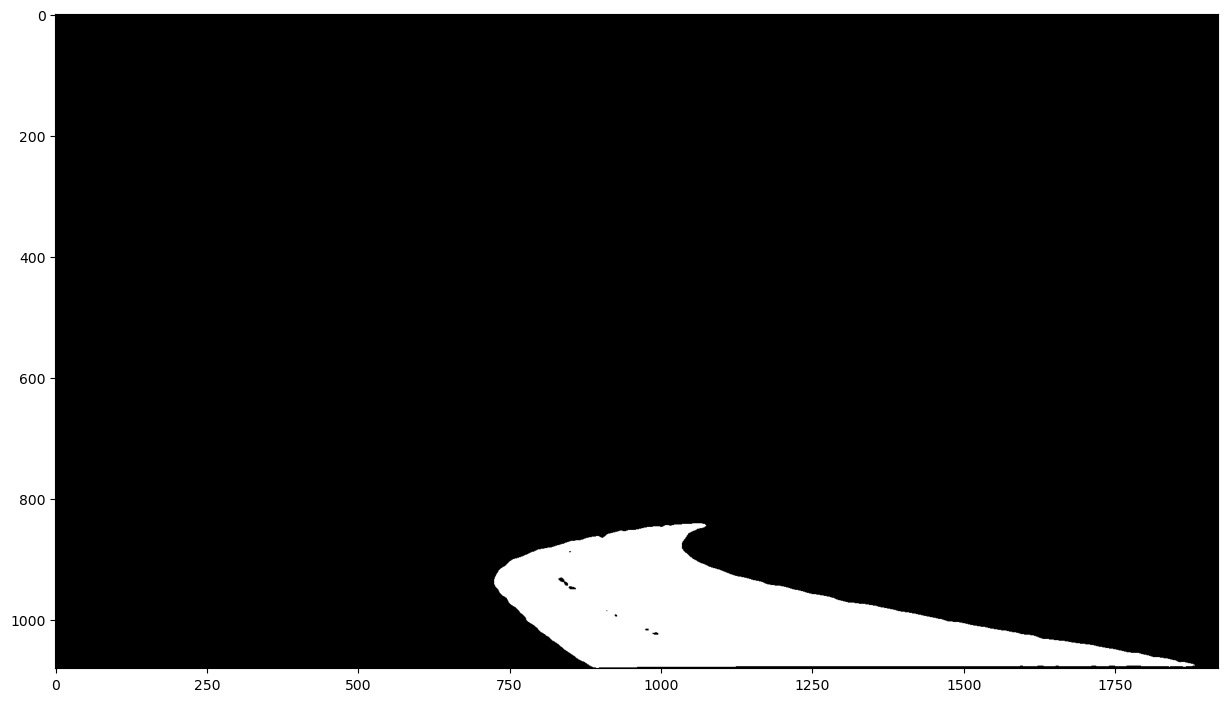

In [40]:
mask_01 = cv2.imread("/home/yelhe/script/mt/output/mask1/1.png")
mask_01 = cv2.cvtColor(mask_01, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (15,15))
plt.imshow(mask_01)
plt.axis('on')
plt.show

In [41]:
mask_out = cv2.subtract(mask_01, imageo)
mask_out_1 = cv2.subtract(mask_01, mask_out)


In [42]:
# plt.figure(figsize = (15,15))
# plt.imshow(mask_out)
# plt.axis('on')
# plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

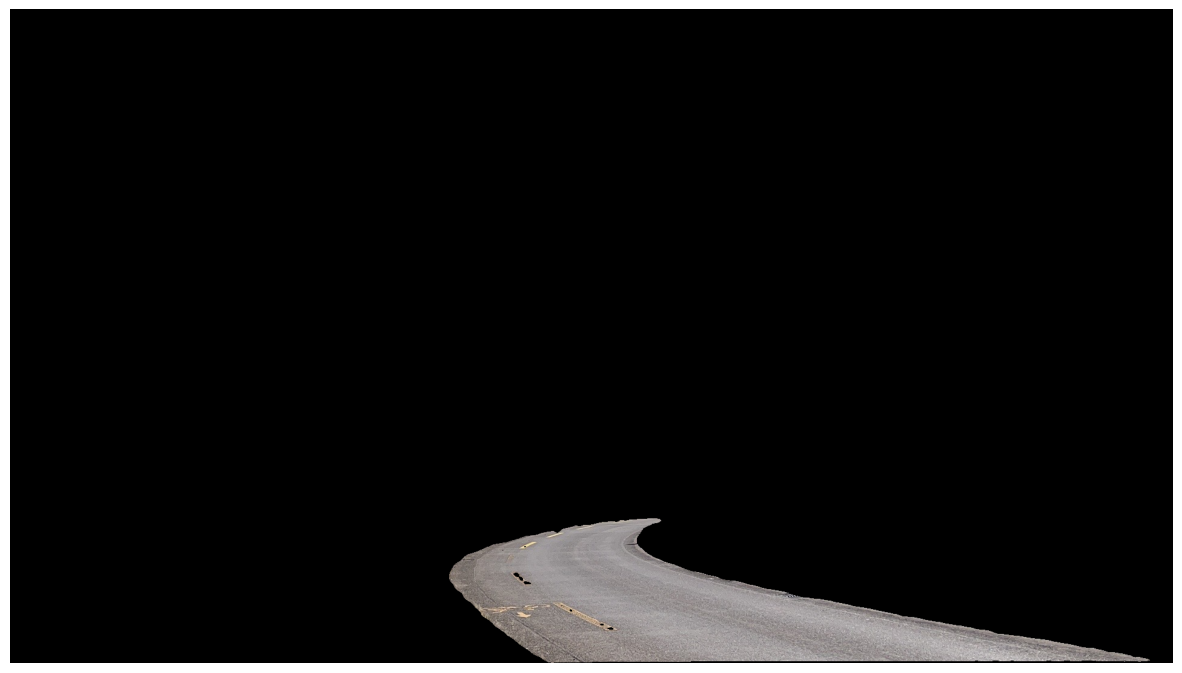

In [43]:
plt.figure(figsize = (15,15))
plt.imshow(mask_out_1)
plt.axis('off')
plt.show

In [44]:
tmp = cv2.cvtColor(mask_out_1, cv2.COLOR_BGR2GRAY)
_, alpha = cv2.threshold(tmp, 0, 255, cv2.THRESH_BINARY) 
  
# Using cv2.split() to split channels of coloured image 
b, g, r = cv2.split(mask_out_1) 
  
# Making list of Red, Green, Blue 
# Channels and alpha 
rgba = [b, g, r, alpha] 
  
# Using cv2.merge() to merge rgba 
# into a coloured/multi-channeled image 
dst = cv2.merge(rgba, 4) 
  
# Writing and saving to a new image 

In [45]:
# plt.figure(figsize = (15,15))
# plt.imshow(dst)
# plt.axis('on')
# plt.show

In [46]:
dst.shape

(1080, 1920, 4)

## Features summary

### Spectual Features

In [47]:
# imgo = imageo
# print(imageo.shape)
# hist_b_o = cv2.calcHist([imgo], [0], None, [256] ,[0,256])
# plt.plot(hist_b_o, color = 'b')
# plt.title('Image Histograme for Blue Channel')
# plt.show


In [28]:
# imgo = imageo
# hist_g_o = cv2.calcHist([imgo], [1], None, [256] ,[0,256])
# plt.plot(hist_g_o, color = 'g')
# plt.title('Image Histograme for Green Channel')
# plt.show


In [29]:
# imgo = imageo
# hist_r_o = cv2.calcHist([imgo], [2], None, [256] ,[0,256])
# plt.plot(hist_r_o, color = 'r')
# plt.title('Image Histograme for Red Channel')
# plt.show


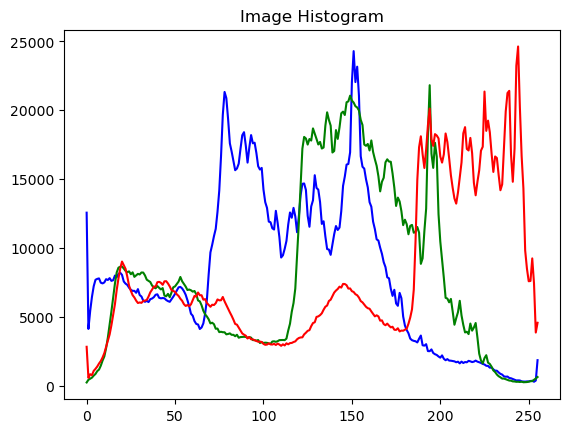

In [120]:
# define colors to plot the histograms 
colors = ('b','g','r') 
  
# compute and plot the image histograms 
for i,color in enumerate(colors): 
    hist = cv2.calcHist([imageo],[i],None,[256],[0,256]) 
    plt.plot(hist,color = color) 
plt.title('Image Histogram') 
plt.show()

In [32]:
# # masko_01 = cv2.imread("/home/yelhe/script/mt/output/masks/1.png")
# # masko_01
# masko01 = maskso[0]['segmentation']
# # masko01 = int(masko01 == 'True')
# masko01 = masko01 * 1
# masko01.shape
# type(masko01)

numpy.ndarray

In [131]:
masked_img_0 = cv2.bitwise_and(imageo,imageo,mask = m0)

<function matplotlib.pyplot.show(close=None, block=None)>

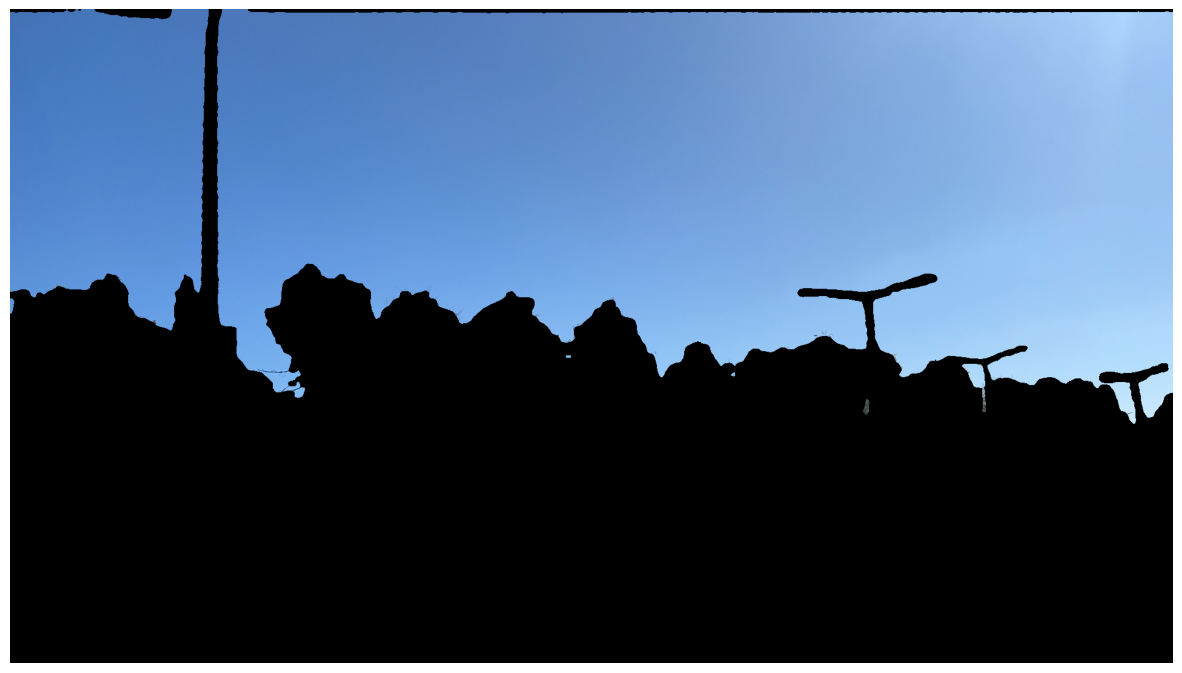

In [132]:
plt.figure(figsize = (15,15))
plt.imshow(masked_img_0)
plt.axis('off')
plt.show

In [33]:
# img1_bg = cv2.bitwise_and(imgo, imgo, mask = masko01)
# plt.plot(img1.bg)
# plt.show

In [34]:
# imgo = imageo
# hist_b_o = cv2.calcHist([imgo], [0], None, [256] ,[0,256])
# plt.plot(hist_b_o, color = 'b')
# plt.title('Image Histograme for Blue Channel')
# plt.show


In [35]:
# Color
# Writing and saving to a new image 
cv2.imwrite("output/gfg_white.jpg", dst)
img = cv2.imread('output/gfg_white.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print(img.shape) # shape of image
print(img.size) # number of pixels
print(img.dtype) # image data type
# b, g, r = cv2.split(img)
# print(b, g, r) # splitting image B, G, R channels
# print(img) # pixel values
print(img.ndim) # dimension

(1080, 1920, 3)
6220800
uint8
3


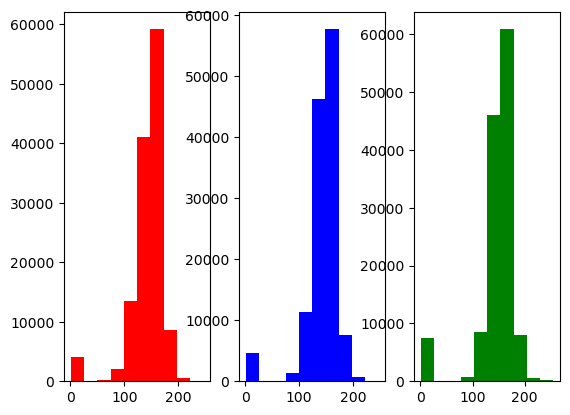

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=3)

red_pixel = np.array(img[:, :, 0]).reshape(-1)
blue_pixel = np.array(img[:, :, 1]).reshape(-1)
green_pixel = np.array(img[:, :, 2]).reshape(-1)


axes[0].hist(red_pixel[red_pixel >0], color='red')
axes[1].hist(blue_pixel[blue_pixel>0], color = 'blue')
axes[2].hist(green_pixel[green_pixel>0], color = 'green')
plt.show()

In [37]:
# red_pixel = np.array(img[:, :, 0]).reshape(-1)
# blue_pixel = np.array(img[]).reshape(-1)

In [148]:
m0b = masked_img_0[:,:,0]
m0g = masked_img_0[:,:,1]
m0r = masked_img_0[:,:,2]

In [153]:
m00b = m0b[np.where(m0b != 0)]
m00g = m0g[np.where(m0g != 0)]
m00r = m0r[np.where(m0r != 0)]

In [154]:
# masked_img_0
#m00 = masked_img_0[np.where(masked_img_0 != 0)]
#print(m00)

In [163]:
# define colors to plot the histograms 
# colors = ('b','g','r') 
# m00 = cv2.merge((m00b, m00g, m00r)) 
# # compute and plot the image histograms 
# for i,color in enumerate(colors): 
#     hist = cv2.calcHist([m00],[i],None,[256],[0,256]) 
#     plt.plot(hist,color = color) 
# plt.title('Image Histogram') 
# plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

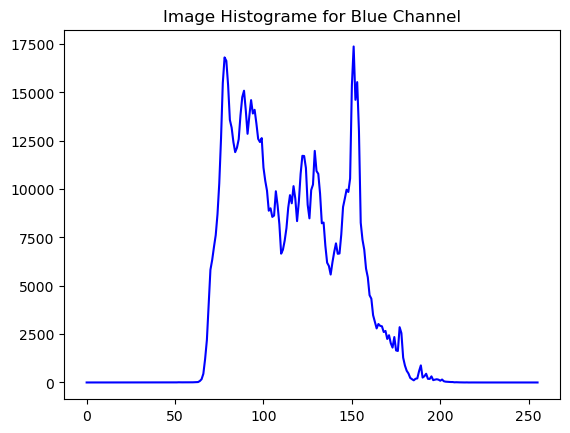

In [151]:
# Blue
hist_b = cv2.calcHist([m00b], [0], None, [256] ,[0,256])
plt.plot(hist_b, color = 'b')
plt.title('Image Histograme for Blue Channel')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

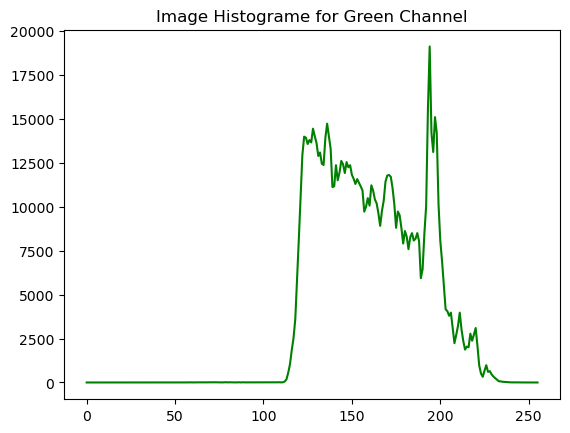

In [157]:
# Green
hist_g = cv2.calcHist([m00g], [0], None, [256] ,[0,256])
plt.plot(hist_g, color = 'g')
plt.title('Image Histograme for Green Channel')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

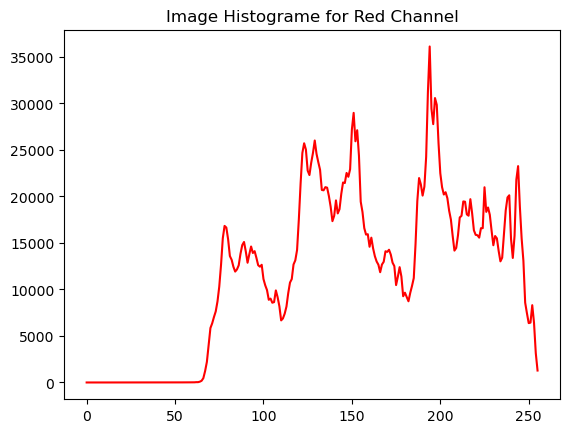

In [158]:
# Red
hist_r = cv2.calcHist([m00], [0], None, [256] ,[0,256])
plt.plot(hist_r, color = 'r')
plt.title('Image Histograme for Red Channel')
plt.show


In [169]:
print('b',np.median(m00b, axis=0))
print('g',np.median(m00g, axis=0))
print('r',np.median(m00r, axis=0))

b 113.0
g 159.0
r 220.0


In [170]:
# masked_img_0.median(axis=0).median(axis=0)

AttributeError: 'numpy.ndarray' object has no attribute 'median'

## Apply to all masks

In [42]:
# Import images into a list
maskso = [cv2.imread(file) for file in glob.glob("/home/yelhe/script/mt/output/mask1/*.png")]
len(maskso)

48

In [43]:
# Convert them with cvtColor
for i in range(0, len(maskso)):
    maskso[i] =  cv2.cvtColor(maskso[i], cv2.COLOR_BGR2RGB)

<function matplotlib.pyplot.show(close=None, block=None)>

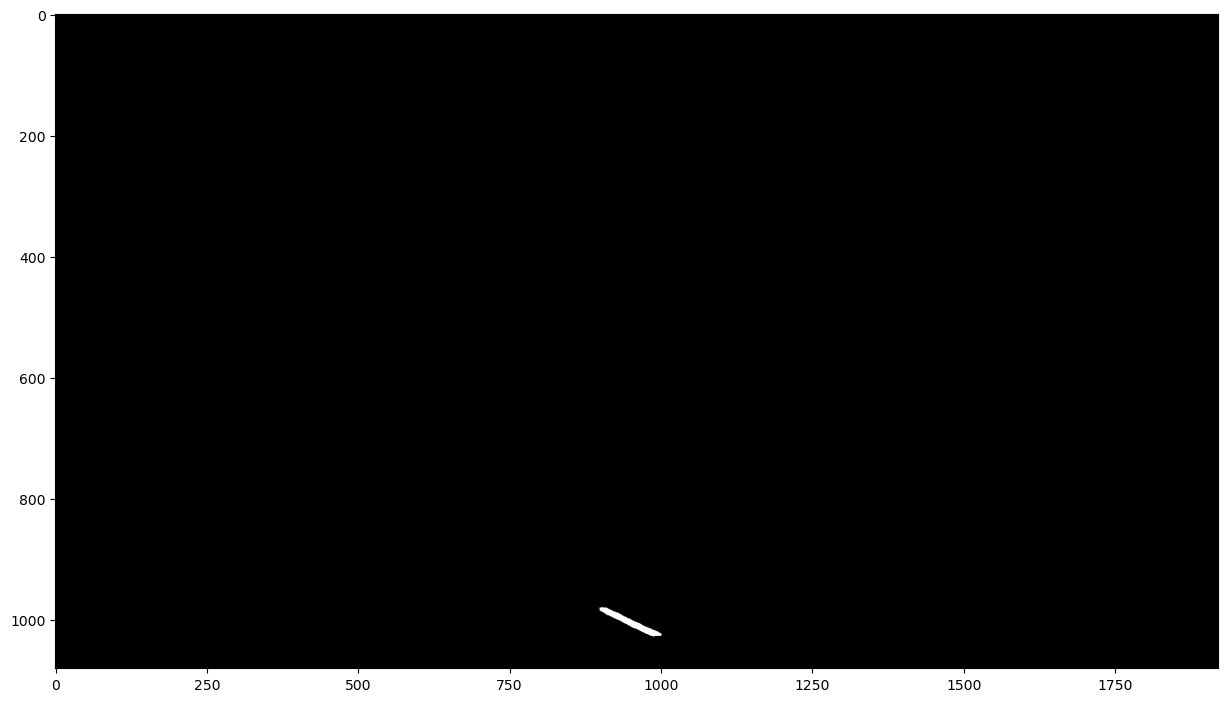

In [44]:
plt.figure(figsize = (15,15))
plt.imshow(maskso[3])
plt.axis('on')
plt.show

In [17]:
imageo[maskso[0]['segmentation']]

array([[ 69, 116, 186],
       [ 69, 116, 186],
       [ 69, 116, 186],
       ...,
       [193, 223, 234],
       [204, 234, 245],
       [213, 239, 252]], dtype=uint8)

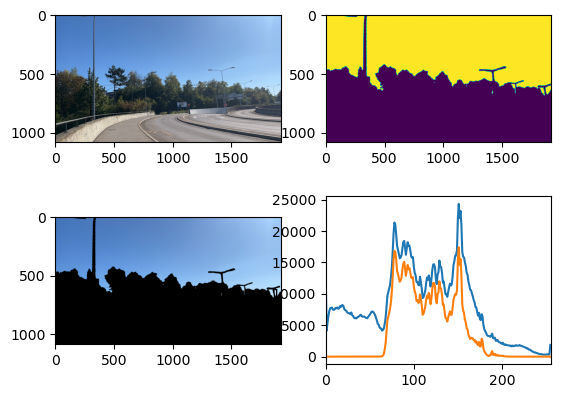

In [171]:
# # sPECTURAL FEATURES OF EACH MASK
imgo = imageo
# assert img is not None, "file could not be read, check with os.path.exists()"
# create a mask
hist_full = cv2.calcHist([imgo],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([imgo],[0],m0,[256],[0,256])
plt.subplot(221), plt.imshow(imgo)
plt.subplot(222), plt.imshow(m0)
plt.subplot(223), plt.imshow(masked_img_0)
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

# Geomatric attributes

In [46]:
# find the contours
# ret, thresh = cv2.threshold(maskso[0], 50, 255, 0)
# contours,hierarchy = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# print("Number of contours detected:",len(contours))
# for cnt in contours:
#    approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt, True), True)
#    (x,y)=cnt[0,0]
#    if len(approx) >= 5:
#       maskso[0] = cv2.drawContours(maskso[0], [approx], -1, (0,255,255), 3)
#       cv2.putText(img, 'Polygon', (x, y),
# cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 0), 2)
# cv2.imshow("Polygon", maskso[0])
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [47]:
im = maskso[1]
assert im is not None, "file could not be read, check with os.path.exists()"
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)



img_con1 = cv2.drawContours(im, contours, -1, (0,255,0), 3)
print("Number of contours detected:",len(contours))


Number of contours detected: 2


In [48]:
# for cnt in contours:
#    approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt, True), True)
#    # (x,y)=cnt[0,0]
#    if len(approx) >= 5:
#       img = cv2.drawContours(im, [approx], -1, (0,255,255), 3)
#       # cv2.putText(img, 'Polygon', (x, y),
# # cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 0), 2)
# cv2.imshow("Polygon", img)
# cv2.waitKey(0)
# # cv2.destroyAllWindows()

<function matplotlib.pyplot.show(close=None, block=None)>

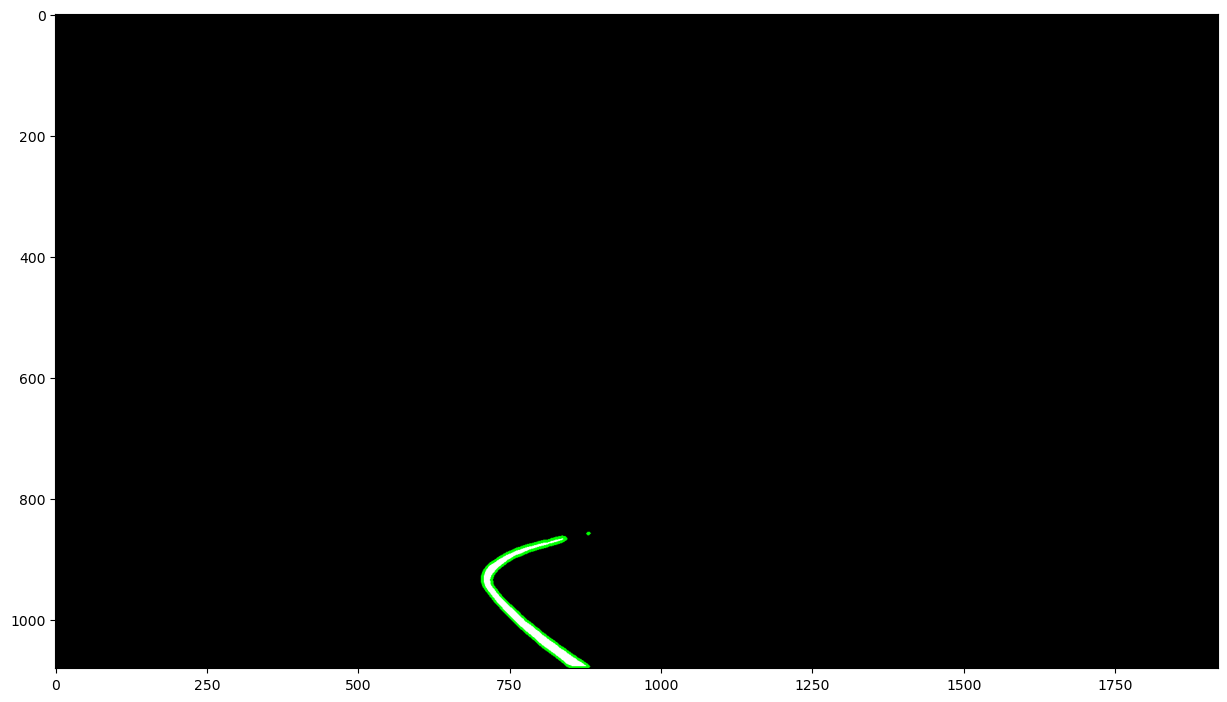

In [49]:
plt.figure(figsize = (15,15))
plt.imshow(img_con1)
# plt.imshow(contours)
plt.axis('on')
plt.show

In [50]:
print(type(contours))
# for j in range(0, len(contours)):
#     cont[j] = np.array('i', contours[j])
print(type(contours[0]))

<class 'tuple'>
<class 'numpy.ndarray'>


In [51]:
# window_name = 'Image'
 
# Polygon corner points coordinates
pts = contours[0] 
image = im

pts = pts.reshape((-1, 1, 2))
 
isClosed = True
 
# Green color in BGR
color = (0, 255, 0)
 
# Line thickness of 8 px
thickness = 8
 
# Using cv2.polylines() method
# Draw a Green polygon with 
# thickness of 1 px
image = cv2.polylines(image, [pts], 
                      isClosed, color, 
                      thickness)
 
# Displaying the image
# while(1):
     
#     cv2.imshow('image', image)
#     if cv2.waitKey(20) & 0xFF == 27:
         
#         break
# cv2.destroyAllWindows()

<function matplotlib.pyplot.show(close=None, block=None)>

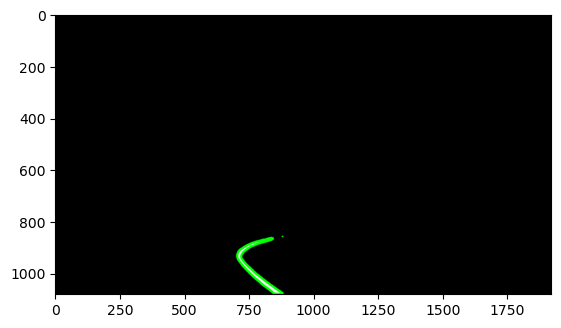

In [52]:
# plt.figure(figsize = (15,15))
# plt.imshow(img)
plt.imshow(image)
plt.axis('on')
plt.show

In [53]:
contour = np.squeeze(contours[0])
polygon = Polygon(contour)
#print(polygon.wkt)

In [54]:
contour = map(np.squeeze, contours)
polygons = map(Polygon, contour)
multipolygon = shapely.MultiPolygon(polygons)

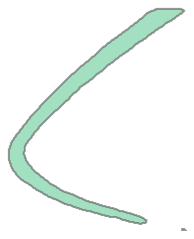

In [55]:
multipolygon

In [56]:
type(multipolygon)

shapely.geometry.multipolygon.MultiPolygon

(<matplotlib.patches.PathPatch at 0x14ce21e9a290>,
 <matplotlib.lines.Line2D at 0x14cde9fa5850>)

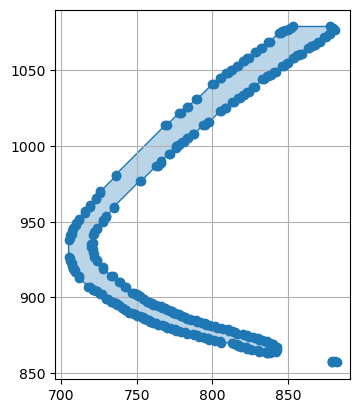

In [57]:
shapely.plotting.plot_polygon(multipolygon)

In [58]:
c0 = contours[0]

In [59]:
print(cv2.isContourConvex(c0))
print(cv2.minAreaRect(c0))


False
((788.6535034179688, 983.2508544921875), (220.021728515625, 148.7147674560547), 79.8379135131836)


In [60]:
# mar0 = cv2.minAreaRect(c0)
# box = np.int0(cv2.boxPoints(mar0))
# cv2.imshow('imgo', imgo)
# cv2.polylines(imgo, [box], True, (36, 255, 12),3) 
# cv2.waitKey()

In [61]:
# maskcon1 = np.zeros(imgo.shape, np.uint8)
# cv2.drawContours(imgo, contours[0], -1, 255, -1) 
# contour_mean = cv2.mean(imgo, mask = maskcon1)


In [62]:
# write a function for all the above feature extraction
def extract_poly(masks, i):
    # import
    im = masks[i]
    assert im is not None, "file could not be read, check with os.path.exists()"
    imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    # draw contours
    ret, thresh = cv2.threshold(imgray, 127, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    img_con = cv2.drawContours(im, contours, -1, (0,255,0), 3)
    print("Number of contours detected:",len(contours))
    
    # show contours
    plt.subplot(2,1,1)
    # plt.figure(figsize = (15,15))
    plt.imshow(img_con)
    # plt.axis('on')
    
    
    pts = contours[0] 
    image = im
    pts = pts.reshape((-1, 1, 2))
    isClosed = True
    color = (0, 255, 0)
    thickness = 8
    image = cv2.polylines(image, [pts], isClosed, color, thickness)
    # convert contour to polygons
    contour = map(np.squeeze, contours)
    polygons = map(Polygon, contour)
    multipolygon = shapely.MultiPolygon(polygons)
    plt.subplot(2,1,2)
    shapely.plotting.plot_polygon(multipolygon)
    print("ok")
    # print(multipolygon)


Number of contours detected: 1
ok


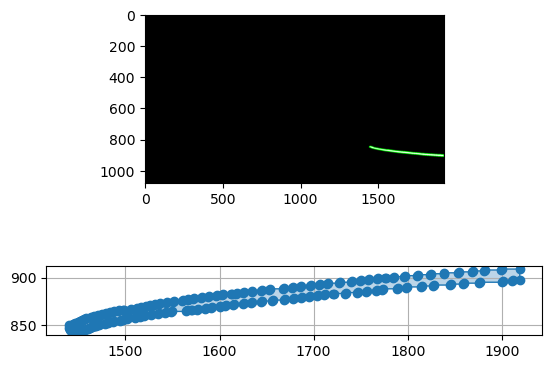

In [63]:
extract_poly(maskso, 46)